<a href="https://colab.research.google.com/github/NavneetSajwan/Hindi-Vowel-Consonant-Classification/blob/master/Hindi_Vowel_Consonant_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install jupyterlab
#usual installation 
!pip install ipywidgets 
# !jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#you are my saver!
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

In [0]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageEnhance
import numpy as np
from time import time
import warnings
import copy
from tqdm import tqdm_notebook
# warnings.filterwarnings("ignore")

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import shutil

In [0]:
from torchvision import models

# Data Fetching

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.environ['KAGGLE_USERNAME'] = "navneetsajwan" 
os.environ['KAGGLE_KEY'] = "fc19a2773ae7ed2042f95e40250fa407" 
!kaggle competitions download -c padhai-hindi-vowel-consonant-classification
!unzip -q  test.zip
!unzip -q  train.zip 

  0% 0.00/145k [00:00<?, ?B/s]
100% 145k/145k [00:00<00:00, 20.1MB/s]
 89% 81.0M/91.3M [00:01<00:00, 53.7MB/s]
100% 91.3M/91.3M [00:01<00:00, 59.2MB/s]
 92% 84.0M/91.3M [00:01<00:00, 43.5MB/s]
100% 91.3M/91.3M [00:01<00:00, 63.0MB/s]


In [0]:
os.mkdir("/content/val")

In [0]:
# !rm -rf '/content/train'

In [0]:
files_train=os.listdir('train/')

files_val=os.listdir('val/')

In [0]:
print(len(files_train), len(files_val))

10000 0


## Creating val data from train data

In [0]:
#creating paths
d_path="/content/val"
s_path="/content/train"

In [0]:
images = os.listdir(s_path)
images

['V6_C9_38.png',
 'V4_C0_27.png',
 'V9_C1_2.png',
 'V3_C7_76.png',
 'V7_C6_68.png',
 'V3_C4_99.png',
 'V9_C7_24.png',
 'V1_C9_83.png',
 'V6_C4_17.png',
 'V0_C6_91.png',
 'V4_C9_30.png',
 'V3_C4_19.png',
 'V8_C5_90.png',
 'V6_C1_67.png',
 'V4_C7_1.png',
 'V3_C3_56.png',
 'V8_C6_29.png',
 'V5_C8_82.png',
 'V8_C8_98.png',
 'V4_C9_60.png',
 'V8_C5_52.png',
 'V4_C5_81.png',
 'V1_C3_26.png',
 'V8_C4_71.png',
 'V2_C1_38.png',
 'V5_C0_10.png',
 'V6_C3_40.png',
 'V2_C8_38.png',
 'V4_C8_39.png',
 'V8_C3_23.png',
 'V9_C2_41.png',
 'V2_C6_95.png',
 'V0_C8_28.png',
 'V1_C2_68.png',
 'V7_C1_67.png',
 'V1_C8_42.png',
 'V7_C6_78.png',
 'V5_C8_33.png',
 'V7_C6_41.png',
 'V8_C7_54.png',
 'V5_C1_13.png',
 'V9_C6_76.png',
 'V0_C0_62.png',
 'V2_C1_77.png',
 'V8_C2_90.png',
 'V6_C3_92.png',
 'V9_C9_8.png',
 'V1_C1_39.png',
 'V5_C9_63.png',
 'V5_C5_13.png',
 'V5_C8_18.png',
 'V6_C2_28.png',
 'V2_C8_39.png',
 'V1_C5_22.png',
 'V2_C5_89.png',
 'V9_C1_86.png',
 'V8_C6_37.png',
 'V7_C7_100.png',
 'V0_C1_28.png',

In [0]:
# Transporting extra images from train to test
images = os.listdir(s_path)# list of images in folder
for i, image in enumerate(tqdm_notebook(images, total = len(images), unit= 'image')):
  s_img_path= os.path.join(s_path, image)
  if i <= 0.75 * len(images):
    # print(i)
    continue
  else:
    # print(i)
    shutil.move(s_img_path, d_path)

In [0]:
files_train=os.listdir('train/')

files_val=os.listdir('val/')

In [0]:
print(len(files_train), len(files_val))

7501 2499


In [0]:
files_val[-10:]

['V0_C1_13.png',
 'V0_C4_97.png',
 'V0_C9_91.png',
 'V4_C5_43.png',
 'V4_C9_97.png',
 'V1_C1_9.png',
 'V5_C6_17.png',
 'V9_C4_52.png',
 'V7_C7_49.png',
 'V3_C7_97.png']

In [0]:
def label_creator(files):
  y_vowel=[]
  y_consonant=[]
  for file in files:
    vowel_idx=int(file[1])
    cons_idx=int(file[4])
    y_vowel.append(vowel_idx)
    y_consonant.append(cons_idx)
  return y_vowel, y_consonant

In [0]:
y_vowel,y_consonant = label_creator(files_train)
y_vval, y_cval = label_creator(files_val)

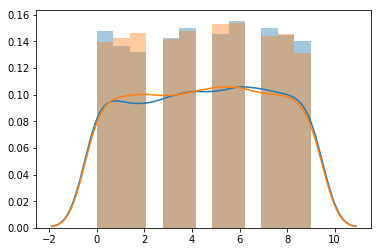

In [0]:
sns.distplot(y_cval )
sns.distplot(y_vval )

In [0]:
files_val[0]

'V3_C9_32.png'

In [0]:
import pandas as pd
df= pd.read_csv("/content/drive/My Drive/vowel-consonant-mapping - Hindi.csv")

In [0]:
vowels=list(df.iloc[1,2:12])
consonants= list(df.iloc[1:11,1])

In [0]:
print(consonants, vowels)

['0', 'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ'] ['अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ऑ']


## Converting image into arrays



In [0]:
transformer = transforms.Compose([
                                  # transforms.Grayscale(1),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,),(0.5,))
                                ])

In [0]:
# image, vow, cons=trainset.__getitem__(3)
# print(image)

In [0]:
class DatasetHindi(Dataset):
  def __init__(self, folderpath, images_list, l_vowel=None, l_cons=None, train=True, transform=None ):
    self.folder_path=folderpath
    self.images_list =  images_list
    self.l_vowel = l_vowel
    self.l_cons = l_cons
    self.transform= transform

  def __len__(self):
    return len(self.images_list)

  def __getitem__(self, index):
    filepath= os.path.join(self.folder_path, self.images_list[index])
    image = Image.open(filepath).convert('RGB')
    # image= ImageEnhance.Sharpness(image).enhance(3.0)
    # image= transforms.functional.adjust_brightness(image,2)
    # image = transforms.functional.adjust_contrast(image, 2)
    # image = transforms.functional.adjust_saturation(image,2)
    
    # torchvision.transforms.functional.to_tensor(image)
    # image = np.array(image).astype(np.uint8)
    # if image.shape[2]==4:
    #   image = image[:,:,:-1]
    # Reshaping the image to torchvision tensors
    # image = np.transpose(image, (2,0,1))
    # print(image.shape)
    if self.transform is not None:
      # print(image.shape)
      image = self.transform(image)
      # print(image.shape)
    if self.l_vowel is not None:
      l_v = self.l_vowel[index]
    else:
      l_v=torch.tensor([])

    if self.l_cons is not None:
      l_c = self.l_cons[index]
    else:
      l_c=torch.tensor([])

    return image, l_v, l_c

In [0]:
trainset = DatasetHindi('train/', files_train, y_vowel, y_consonant, transform=transformer)
batch=8
trainloader=DataLoader(trainset, batch_size= batch, shuffle= False)
image, lab_vowel, lab_cons= iter(trainloader).next()
image.shape
# print(lab_vowel)
# displaying the image post transforms


torch.Size([8, 3, 64, 64])

In [0]:
valset = DatasetHindi('val/', files_val, y_vval, y_cval, transform=transformer)
batch=8
valloader=DataLoader(valset, batch_size= batch, shuffle= False)
image, lab_vowel, lab_cons= iter(valloader).next()
image.shape

torch.Size([8, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0, 'झ उ')

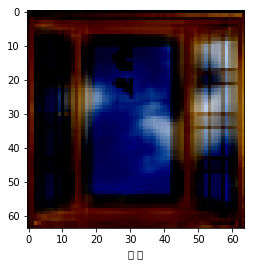

In [0]:
npimg=np.array(image)
npimg= np.transpose(npimg, (0,2,3,1))
sample = np.random.randint(batch)
# sample=0
#Transformed Image
plt.figure()
plt.imshow(npimg[sample,:,:,:])
plt.xlabel(str(consonants[lab_cons[sample]])+" "+str(vowels[lab_vowel[sample]]))

# Creating the Network Class

In [0]:
device="cuda:0" if torch.cuda.is_available() else "cpu"
type(device)

str

In [0]:
resnet18_v=models.resnet18()
resnet18_c=models.resnet18()

In [0]:
# print(resnet18_v)

In [0]:
final_in_features= resnet18_v.fc.in_features
resnet18_v.fc=nn.Linear(final_in_features, out_features=10 , bias=True)

final_in_features= resnet18_c.fc.in_features
resnet18_c.fc=nn.Linear(final_in_features, out_features=10 , bias=True)

# Creating the evaluation function

In [0]:
def evaluation(dataloader, model_v, model_c):
    total, correct_v, correct_c= 0, 0, 0
    for data in dataloader:
        inputs, lab_v, lab_c= data
        inputs, lab_v, lab_c= inputs.to(device), lab_v.to(device), lab_c.to(device)

        outputs_v = model_v(inputs.double())
        outputs_c = model_c(inputs.double())

        # print(outputs_v.shape)
        _, pred_v =torch.max(outputs_v, 1)
        # print(pred_v.shape)
        _, pred_c =torch.max(outputs_c, 1)
        total+= lab_v.size(0)
        correct_v+= (pred_v==lab_v).sum().item()
        correct_c+= (pred_c==lab_c).sum().item()
    return pred_v, pred_c, 100* correct_v/total, 100* correct_c/total


## Creating the Network Object

In [0]:
model_v = resnet18_v.double().to(device)
model_c = resnet18_c.double().to(device)
# for param in model_v.parameters():
#     nn.init.xavier_uniform_(param.unsqueeze(dim=1))
#     param.squeeze()
# for param in model_c.parameters():
#     nn.init.xavier_uniform_(param.unsqueeze(dim=1))
#     param.squeeze()
loss_fn=nn.CrossEntropyLoss()


In [0]:
model_v.load_state_dict(torch.load("/content/drive/My Drive/best_model_v.pth"))
model_c.load_state_dict(torch.load("/content/drive/My Drive/best_model_c.pth"))

<All keys matched successfully>

In [0]:
opt_v=optim.Adam(model_v.parameters(), lr=0.0001 )
opt_c=optim.Adam(model_c.parameters(), lr=0.0001 )


## Loading into dataloaders

In [0]:
batch= 128
trainloader = DataLoader(trainset, batch_size=batch, shuffle=True, num_workers=1)
# valloader= DataLoader(valset, batch_size=batch_size, shuffle=False)
# testloader= DataLoader(testset, batch_size=X_test.shape[0],shuffle=False)

# Training the Network

0.1668785853541713


0.057889215581108024


0.07027020036471972


0.005267010014542422


0.03774731133612689

Training time: 317.7961733341217


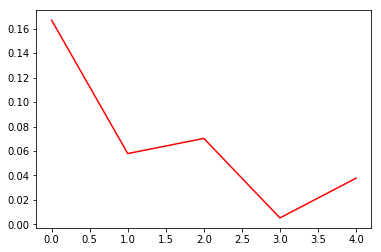

Loss:
Training vowel Accuracy: 98.88 consonant accuracy: 98.88


In [0]:
# using two faced fc
tic=time()

model_v.train()
model_c.train()
loss_per_epoch=[]
loss_arr=[]
max_epochs= 5
min_loss=1000
n_iters=np.ceil(10000/batch)
for epoch in tqdm_notebook(range(max_epochs), total=max_epochs, unit='epochs'):
    # tic=time()
    for _,data in enumerate(tqdm_notebook(trainloader, total=len(trainloader), unit='batches')):
        # toc=time()
        # print("Dataloading Time:", toc-tic)
        # tic=time()
        inputs, lab_v, lab_c = data
        inputs, lab_v, lab_c = inputs.to(device), lab_v.to(device), lab_c.to(device)
        # toc=time()
        # print("Data Loading to gpu time:",toc-tic)
        opt_v.zero_grad()
        opt_c.zero_grad()

        # tic=time()
        outputs_v = model_v(inputs.double())
        outputs_c = model_c(inputs.double())
        # toc=time()
        # print("predicting output time:",toc-tic)

        # tic=time()
        loss=loss_fn(outputs_v, lab_v) + loss_fn(outputs_c, lab_c)
        loss.backward()
        # toc=time()
        # print("Calculating loss and gradients:",toc-tic)

        # tic= time()
        opt_v.step()
        opt_c.step()
        # toc=time()
        # print("Updating the weights:",toc-tic)
        # loss_arr.append(loss.item())
        # if min_loss>loss.item():
        #     min_loss=loss.item()
        #     best_model=copy.deepcopy(model.state_dict())
        # if i % 8==0:
        #     print("Epoch: %d Iteration: %d/%d Loss: %0.3f" %(epoch, i, n_iters, loss.item()))
        del inputs, lab_v, lab_c, outputs_v, outputs_c
        # torch.cuda.empty_cache()
    print(loss.item())
    if min_loss>loss.item():
            min_loss=loss.item()
            best_model_v=copy.deepcopy(model_v.state_dict())
            best_model_c=copy.deepcopy(model_c.state_dict())
    loss_per_epoch.append(loss.item())
toc=time()
print("Training time:", toc-tic)
plt.plot(loss_per_epoch, 'r')
plt.show()
torch.save(best_model_v,"/content/drive/My Drive/best_model_v.pth")
torch.save(best_model_c,"/content/drive/My Drive/best_model_c.pth")

model_v.load_state_dict(best_model_v)
model_c.load_state_dict(best_model_c)

model_v.eval()
model_c.eval()

# torch.save(best_model,"../input/checkpoint/best_model.pth")
# model.load_state_dict(best_model)
# with torch.no_grad():
_, _, acc_v, acc_c= evaluation(trainloader, model_v, model_c)
print("Loss:")
print("Training vowel Accuracy: %0.2f consonant accuracy: %0.2f" %( acc_v , acc_c ))
# print("Test Accuracy: %0.2f" %(evaluation(valloader,model)))

In [0]:
# from sklearn.metrics import confusion_matrix
# # batch= 512
# trainloader = DataLoader(trainset, batch_size=, shuffle=False, num_workers=0)
# model.eval()
# with torch.no_grad():
#   pred_v, pred_c,_, _ = evaluation(trainloader, model)
# cm= confusion_matrix(pred_v.cpu(), y_vowel[-1000:])
# print(cm)

In [0]:
# cm= confusion_matrix(pred_c.cpu(), y_consonant[-1000:])
# print(cm)

In [0]:
batch=8
valset = DatasetHindi('val/', files_val,y_vval, y_cval, transform=transformer)
valloader=DataLoader(valset, batch_size= batch, shuffle= False)
_, _, acc_v, acc_c= evaluation(valloader, model_v, model_c)
print("Training vowel Accuracy: %0.2f consonant accuracy: %0.2f" %( acc_v , acc_c ))

Training vowel Accuracy: 70.15 consonant accuracy: 84.11


## Creating Submission File

In [0]:
a=torch.ones(5)
b=torch.zeros(5)

In [0]:
a= torch.cat((a,b), dim=0)
print(a)

tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])


In [0]:
type(b)

torch.Tensor

In [0]:
def evaluation_test(dataloader, model_v, model_c):
    pred_v= torch.Tensor([])
    pred_c= torch.Tensor([])
    for data in dataloader:
        inputs,_,_= data
        inputs= inputs.to(device)

        outputs_v = model_v(inputs.double())
        outputs_c = model_c(inputs.double())

        # print(outputs_v.shape)
        _, temp_v =torch.max(outputs_v, 1)
        temp_v=temp_v.float().cpu()
        # print(temp_v.shape)
        pred_v= torch.cat((pred_v,temp_v))
        # print(pred_v.shape)
        _, temp_c =torch.max(outputs_c, 1)
        temp_c=temp_c.float().cpu()
        pred_c= torch.cat((pred_c,temp_c))
        del inputs, outputs_v, outputs_c
    return pred_v, pred_c


In [0]:
# batch=128
# files_test= os.listdir('test/')
# testset = DatasetHindi('test/', files_test, transform=transformer)
# testloader=DataLoader(testset, batch_size= batch, shuffle= False)
# vv, cc= evaluation_test(testloader, model_v, model_c)

In [0]:
# print(vv.shape)